# Fifa Players 2020 - Clustering

## Objective 
In this analysis we will be looking into the stats of different FIFA (the game) players and will try to cluster them. We do have a Target variable (so we could say this is a supervised learning exercise), but it will not be used for the clustering. We will, however, use position of the players to verify if our clustering was correctly done by the algorithm

## Hypothesis - What do we want to know?
By doing the clustering, our intention is to figure out if the stats of the players that play in a similar position have, as well, similar stats and skills (using the ingame subjective stats). 

## Data Analysis

### Imports

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [101]:
df = pd.read_csv(r'C:\Users\Gonzalo\Documents\DH\Contenido\ds_blend_students_2020\Proyectos Propios\Prediction Models\03. Clustering Models\Fifa Players\Data\players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


### General Data Analysis

In [102]:
df.dtypes.value_counts()

int64      45
object     43
float64    16
dtype: int64

In [103]:
df.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/229038/christian-riv...,J. Rodríguez,Liam Kelly,1992-02-29,England,Eintracht Frankfurt,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


There dont seem to be duplicate players (all long_names are unique), which is great.

In [104]:
((df.isnull().sum()/df.shape[0]*100).round(2)).sort_values(ascending=False).head(20)

loaned_from             94.27
nation_jersey_number    93.84
nation_position         93.84
player_tags             91.80
gk_diving               88.86
gk_handling             88.86
gk_kicking              88.86
gk_reflexes             88.86
gk_speed                88.86
gk_positioning          88.86
player_traits           58.61
rb                      11.14
st                      11.14
ls                      11.14
dribbling               11.14
shooting                11.14
rcb                     11.14
pace                    11.14
lw                      11.14
passing                 11.14
dtype: float64

Interesting: The GK seem to be missing the values from rb and below (88.86% of the players have them), while the rest of the players seem to be missing the values for gk stats. 

### Brief MV Analysis

Let's verify the hypotheses of the MV:

In [105]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

In [106]:
df[df['dribbling'].isnull()].head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramses Becker,26,1992-10-02,191,91,Brazil,Liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,28,1990-11-07,192,82,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,25,1993-08-17,188,86,Brazil,Manchester City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that all the missing values are for the same players. Let's now check their position

In [107]:
df[df['dribbling'].isnull()]['player_positions'].value_counts()

GK    2036
Name: player_positions, dtype: int64

Great! As we thought, the MV are all of the GKs.

### Data Pre Processing 

For our analysis, we will not do any amends of the missing values or outliers, as we will only focus on the clustering analysis.
For this we will follow this schema: 

1. Filter the DataFrame to retrieve the numeric columns and choose the players we want to cluster
2. Deal with the Missing Values
3. Save the Player Names to visualize results later
4. Standarize the Data
5. Apply PCA to be able to be able to cluster and visualize it
6. Cluster the data
7. Visualize the results

#### 1. Filter categorical columns and picking players to cluster 

In [108]:
num_col = []
for c in df.columns:
    if df[c].dtype in ['float64','int64']:
        num_col.append(c)

num_col.append('short_name')
num_col.remove('sofifa_id')

In [109]:
df_num = df[num_col]

In [110]:
df_num.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,short_name
0,32,170,72,94,94,95500000,565000,5,4,4,...,96,33,37,26,6,11,15,14,8,L. Messi
1,34,187,83,93,93,58500000,405000,5,4,5,...,95,28,32,24,7,11,15,14,11,Cristiano Ronaldo
2,27,175,68,92,92,105500000,290000,5,5,5,...,94,27,26,29,9,9,15,15,11,Neymar Jr
3,26,188,87,91,93,77500000,125000,3,3,1,...,68,27,12,18,87,92,78,90,89,J. Oblak
4,28,175,74,91,91,90000000,470000,4,4,4,...,91,34,27,22,11,12,6,8,8,E. Hazard


In [111]:
df_num = df_num[df_num.overall > 86] # extracting players with overall above 86
df_num.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,short_name
0,32,170,72,94,94,95500000,565000,5,4,4,...,96,33,37,26,6,11,15,14,8,L. Messi
1,34,187,83,93,93,58500000,405000,5,4,5,...,95,28,32,24,7,11,15,14,11,Cristiano Ronaldo
2,27,175,68,92,92,105500000,290000,5,5,5,...,94,27,26,29,9,9,15,15,11,Neymar Jr
3,26,188,87,91,93,77500000,125000,3,3,1,...,68,27,12,18,87,92,78,90,89,J. Oblak
4,28,175,74,91,91,90000000,470000,4,4,4,...,91,34,27,22,11,12,6,8,8,E. Hazard


#### 2. Handling Missing Values

In [112]:
pd.set_option('display.max_rows', 65)
df_num.isnull().sum()

age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          21
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
gk_diving                     45
gk_handling                   45
gk_kicking                    45
gk_reflexes                   45
gk_speed                      45
gk_positioning                45
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_

In [113]:
df_num.fillna(df_num.mean(),inplace=True)

In [114]:
df_num.isnull().sum().sort_values(ascending=False).head(2)

short_name                 0
attacking_short_passing    0
dtype: int64

#### 3. Saving the names of the players and dropping the categorical column

We would not be able to do this in an unsupervised learning project, as we would not have the target variable. However, we will use it in this case to verify the results of our clustering model.

In [115]:
player_names = df_num['short_name']
df_num.drop('short_name',axis=1,inplace=True)

In [116]:
df_num.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8


#### 4. Normalize the Data

As the algorithm will be using distances to cluster the different observations together, the values of the features have to be normalized.

In [117]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

minmax_scaler = MinMaxScaler()
x_scaled = minmax_scaler.fit_transform(df_num)
X_norm = pd.DataFrame(x_scaled)

In [118]:
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,...,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,...,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,...,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,...,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,...,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180


#### 5. Apply PCA to cluster and visualize

As we want to be able to visualize the results of our clustering algorithm, we will use PCA to reduce the dimensionality of our data to 2D

In [119]:
from sklearn.decomposition import PCA

#We instantiate PCA and set the dimensionality of our new DF
pca = PCA(n_components = 2) #Set 2D
df_pca = pd.DataFrame(pca.fit_transform(X_norm))

In [120]:
#pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2']) - Useful for interpretability

In [121]:
df_pca.head()

,0,1
0,-1.482137,-1.287998
1,-1.180190,-0.894344
2,-1.335542,-1.460300
3,2.974839,-0.789651
4,-1.207091,-1.249757


#### 6.1. Cluster the Data - Kmeans

In [122]:
from sklearn.cluster import KMeans

# Instantiate the algorithm
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(df_pca)

# get the cluster labels
labels = kmeans.predict(df_pca)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [123]:
df_kmeans = df_pca.copy()
df_kmeans['cluster'] = clusters
df_kmeans['name'] = player_names
df_kmeans.columns = ['x', 'y', 'cluster', 'name']
df_kmeans.head()

,x,y,cluster,name
0,-1.482137,-1.287998,3,L. Messi
1,-1.180190,-0.894344,3,Cristiano Ronaldo
2,-1.335542,-1.460300,3,Neymar Jr
3,2.974839,-0.789651,2,J. Oblak
4,-1.207091,-1.249757,3,E. Hazard


#### 7.1. Visualize the results

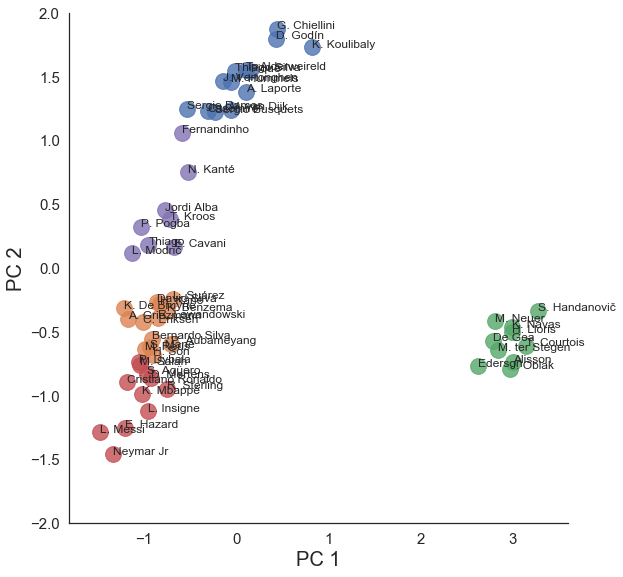

In [124]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_kmeans, legend=False,
                   fit_reg=False, height = 8, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(df_kmeans.x, df_kmeans.y, df_kmeans.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

#### 6.2. Cluster the Data - DBSCAN

In [125]:
from sklearn.cluster import DBSCAN

# Instantiate DBSCAN
db = DBSCAN(eps=1, min_samples=5)

# prediction for dbscan clusters
db_clusters = db.fit_predict(df_pca)

In [126]:
df_db = df_pca.copy()
df_db['cluster'] = db_clusters
df_db['name'] = player_names
df_db.columns = ['x', 'y', 'cluster', 'name']
df_db.head()

,x,y,cluster,name
0,-1.482137,-1.287998,0,L. Messi
1,-1.180190,-0.894344,0,Cristiano Ronaldo
2,-1.335542,-1.460300,0,Neymar Jr
3,2.974839,-0.789651,1,J. Oblak
4,-1.207091,-1.249757,0,E. Hazard


#### 7.2. Visualize the results

C:\Users\Gonzalo\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


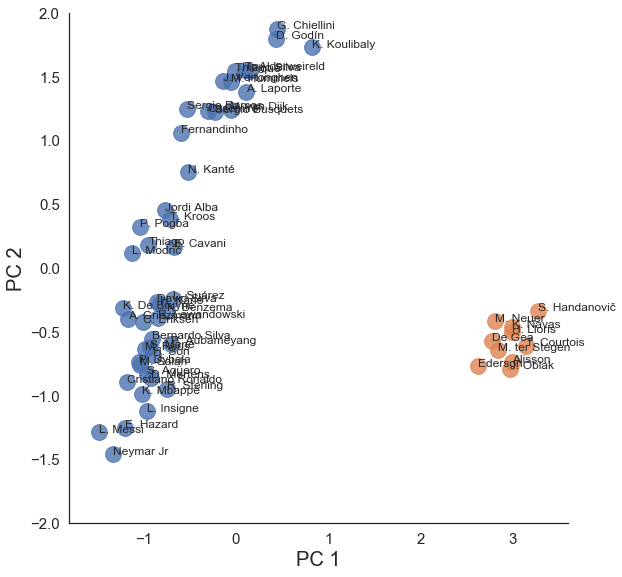

In [127]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_db, legend=False,
                   fit_reg=False, size = 8, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(df_db.x, df_db.y, df_db.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

#### 7.2.1 Find Optimal Epsilon

- find an optimal epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results.

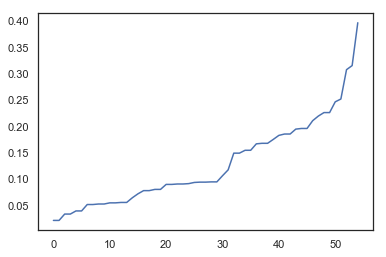

In [128]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor
nbrs = nn.fit(df_pca)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(df_pca)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Apply DBSCAN again with a New Eps

In [129]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db= DBSCAN(eps=0.3, min_samples=4)

# prediction for dbscan clusters
db_clusters = db.fit_predict(df_pca)

df_db['cluster'] = db_clusters
df_db['name'] = player_names
df_db.columns = ['x', 'y', 'cluster', 'name']
df_db.head()

,x,y,cluster,name
0,-1.482137,-1.287998,0,L. Messi
1,-1.180190,-0.894344,0,Cristiano Ronaldo
2,-1.335542,-1.460300,0,Neymar Jr
3,2.974839,-0.789651,1,J. Oblak
4,-1.207091,-1.249757,0,E. Hazard


#### Plot again with a new Eps = 0.3

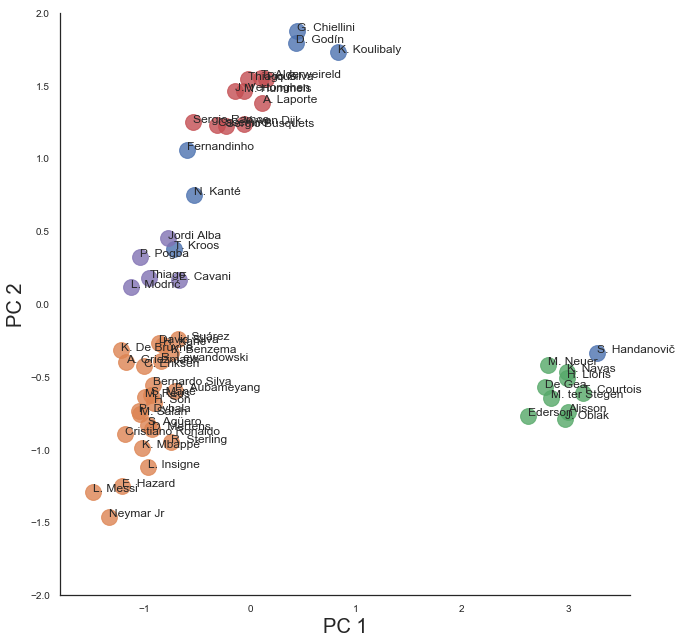

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_db, legend=False,
                   fit_reg=False, height = 9, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(df_db.x, df_db.y, df_db.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()